In [1]:
%matplotlib inline

import geopandas as gpd

import sys
sys.path.insert(0, "../")
from weavingspace import TileUnit
from weavingspace import Tiling

In [2]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

# Cairo tiles [3<sup>2</sup>.4.3.4]
The one true tiling. Provides 4 directionally distinguishable elements... and also can be read two different ways (intersecting hexagons runninng in two orthogonal directions).

<Axes: >

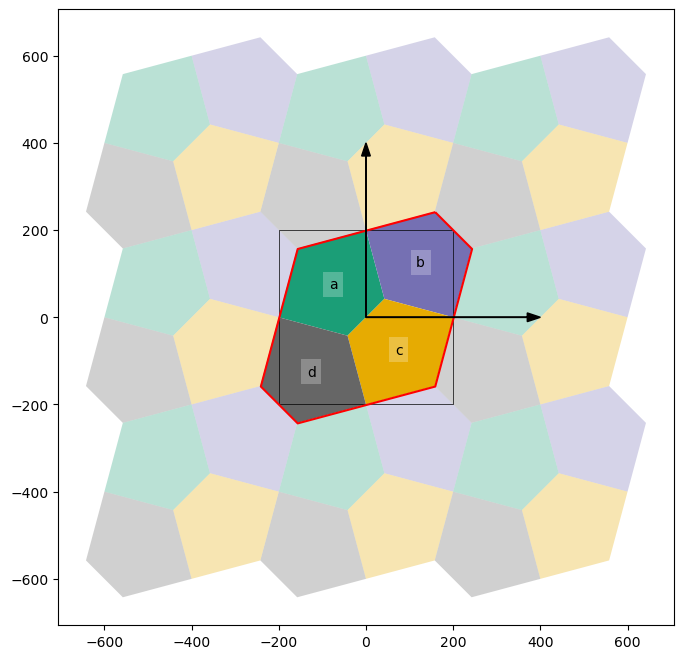

In [3]:
tile_unit = TileUnit(tiling_type = "laves", code = "3.3.4.3.4",
                     spacing = 400, crs = ak.crs)
tile_unit.plot(r = 1, show_vectors = True)

In [4]:
tiling = Tiling(tile_unit.inset_prototile(12.5), ak)

Initialising Tiling: 7.082708179950714e-07
Indexing the region: 0.0012415419332683086
Forming the region union: 0.2737007080577314
Building the grid: 0.8276093336753547
Making the tiles: 1.0589044163934886
Indexing the tiles: 0.002481041941791773


In [5]:
t = tiling.get_tiled_map(rotation = 45, debug = True,
                         join_on_prototiles = False)

STEP 1: prep data (rotation if requested): 1.539
STEP A2: overlay zones with tiling: 0.531
STEP A3: calculate areas: 0.001
STEP A4: drop columns prior to join: 0.001
STEP A5: build lookup for join: 0.091
STEP A6: perform lookup join: 0.004


No tile ids provided: setting all of them!
Setting defaults for the 'categoricals' attribute of the map.


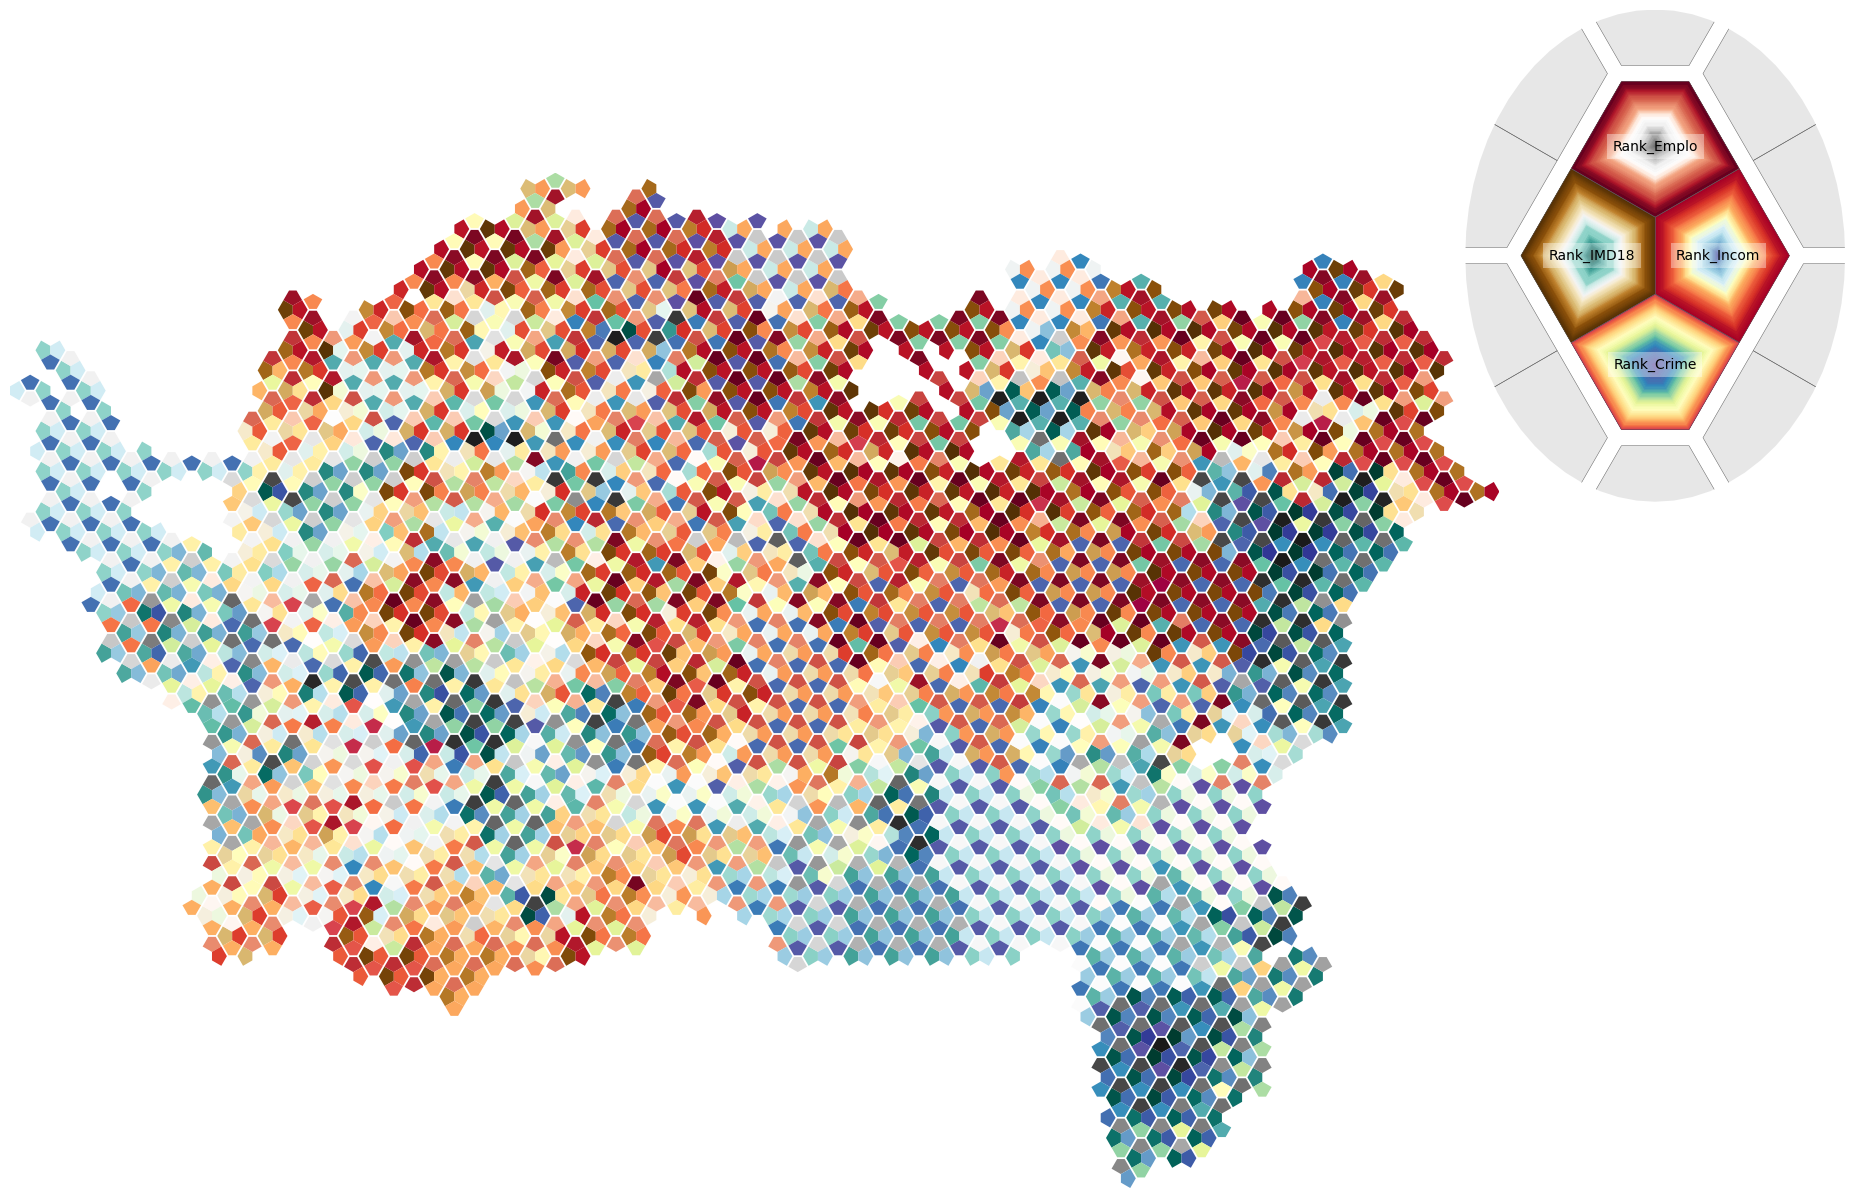

In [6]:
t.vars_to_map = [x for x in ak if "Rank" in x]
t.colors_to_use = ("BrBG", "RdGy", "RdYlBu", "Spectral",
                   "PiYG", "PRGn", "PuOr", "viridis")

fig = t.render(use_ellipse = True, legend_dx = -0.05, legend_dy = -0.05)

## An alternative perspective
The elements of any given tiling can be rearranged with respect to the base tile, and if the `regularised_tile` is then remade from the repositioned elements, different effects can be achieved by insetting to emphasize different repeating units in the pattern.

In this case, we move the lower two elements _c_ and _d_ up half a tile, and the upper two _a_ and _b_ down half a tile we can form a cross-like grouping of the tiles instead of the hexagonal arrangement. The retiled map is quite different in appearance, although it contains the same data.

<Axes: >

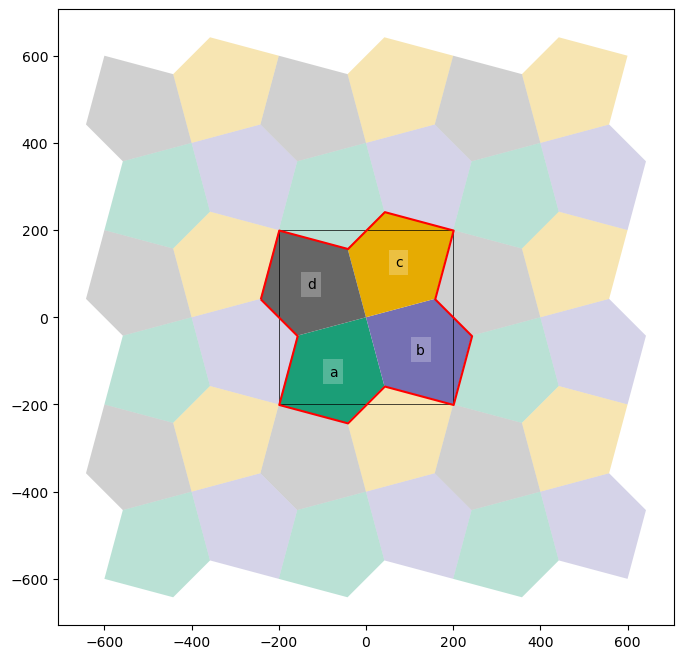

In [7]:
from shapely.affinity import translate

v = tile_unit.get_vectors()
v = [v[2], v[2], v[0], v[0]]  # these are the up and down vectors
tile_unit.tiles.geometry = gpd.GeoSeries(
    [translate(g, xy[0] / 2, xy[1] / 2) 
     for g, xy in zip(tile_unit.tiles.geometry, v)])
tile_unit._setup_regularised_prototile()
tile_unit.plot(r = 1)

Initialising Tiling: 7.920898497104645e-07
Indexing the region: 0.0034371246583759785
Forming the region union: 0.29239804204553366
Building the grid: 0.7536830832250416
Making the tiles: 1.0151723749004304
Indexing the tiles: 0.0021237079054117203
STEP 1: prep data (rotation if requested): 0.001
STEP A2: overlay zones with tiling: 0.252
STEP A3: calculate areas: 0.001
STEP A4: drop columns prior to join: 0.000
STEP A5: build lookup for join: 0.025
STEP A6: perform lookup join: 0.004
No tile ids provided: setting all of them!
Setting defaults for the 'categoricals' attribute of the map.


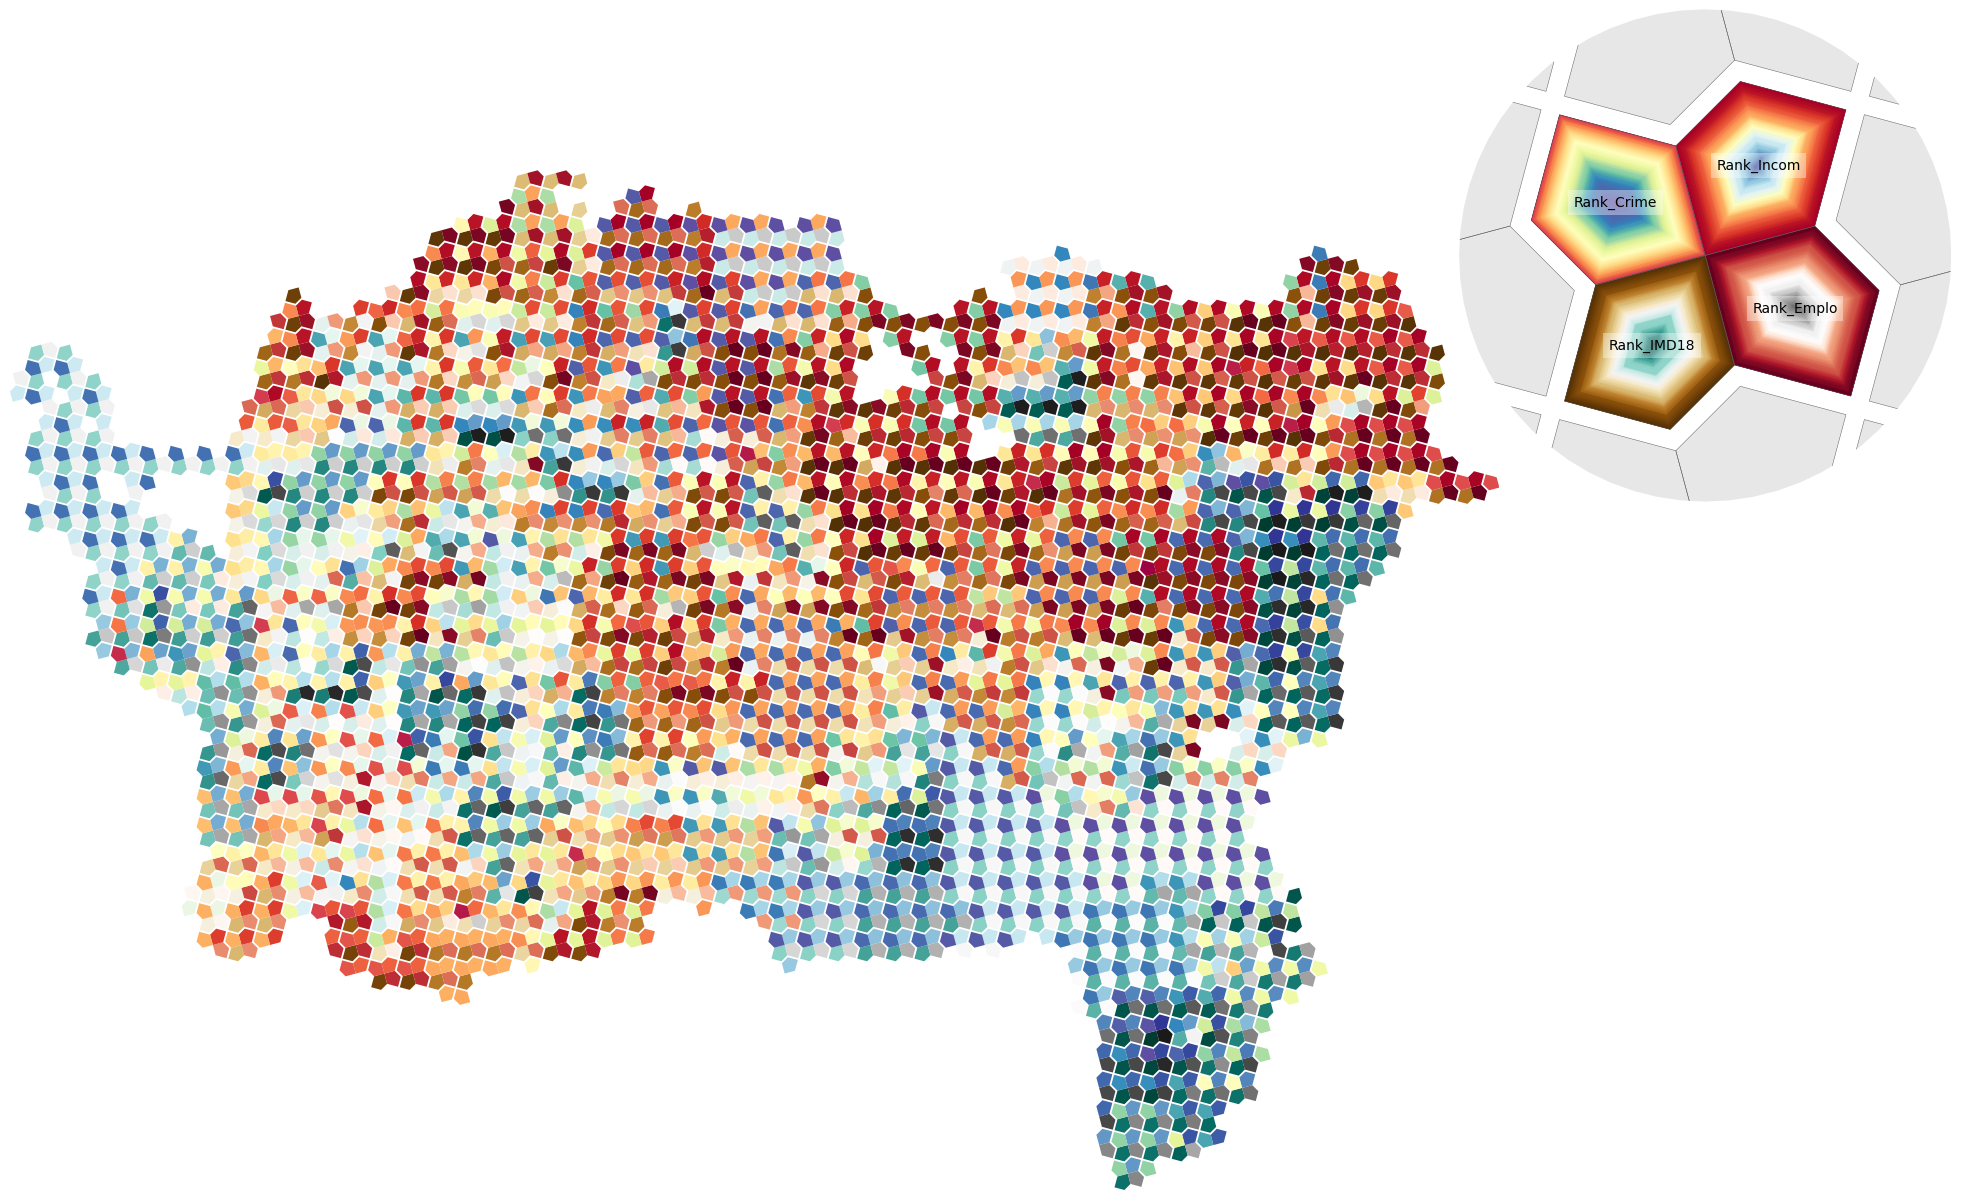

In [9]:
tiling = Tiling(tile_unit.inset_prototile(12.5), ak)
t = tiling.get_tiled_map(debug = True, 
                         join_on_prototiles = True)

t.vars_to_map = [x for x in ak if "Rank" in x]
t.colors_to_use = ("BrBG", "RdGy", "RdYlBu", "Spectral",
                   "PiYG", "PRGn", "PuOr", "viridis")

fig = t.render(use_ellipse = True, legend_dx = -0.025, legend_dy = -0.05)